In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

### Data Cleaning

In [2]:
# read the raw csv file
df =pd.read_csv("Resources/data.csv")
df.head(15)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [3]:
# Count unique values in Order ID
df['Order ID'].nunique()

9994

In [4]:
# check the shape of the dataframe
df.shape

(9994, 11)

In [4]:
# check datatype for all columns
df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [5]:
# Replace hyphens with slashes for consistency in Order date column
df["Order Date"] = df["Order Date"].str.replace('-', '/')

In [6]:
# change the dataype for the 'date' column to datatime
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce', dayfirst=False)
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu


In [8]:
# Get the summary statistics
df[['Sales', 'Discount', 'Profit']].describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [9]:
# check missing values
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [10]:
# check duplicates
df.duplicated().sum()

0

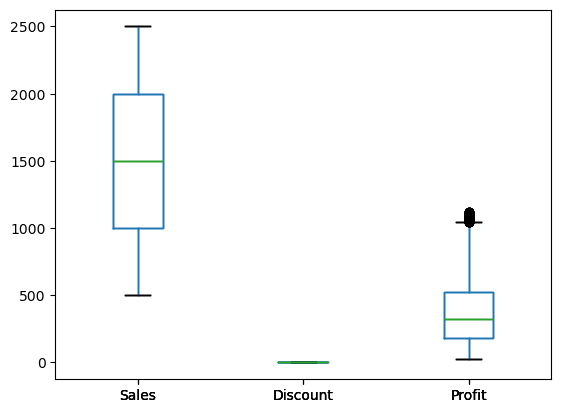

In [10]:
# check outliers for sales, discount and profit for outliers. Remove gridlines

df[['Sales', 'Discount', 'Profit']].boxplot()
plt.grid(False)

plt.show()


### Exploratory Data Analysis

In [12]:
# check the unique values for the categorical column
df["Category"].unique()


array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [13]:
# Rename ''Oil & Masala' to "seasoning"
df["Category"] = df["Category"].replace("Oil & Masala", "seasoning")
# check the unique values for the categorical column
df["Category"].unique()

array(['seasoning', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [14]:
# Display data for Category column which has 'seasoning' as row value
df[df["Category"] == "seasoning"].head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,seasoning,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
15,OD16,Ramesh,seasoning,Edible Oil & Ghee,Krishnagiri,2016-11-22,Central,1440,0.11,100.80,Tamil Nadu
29,OD30,Shah,seasoning,Masalas,Kanyakumari,2016-09-17,East,989,0.17,69.23,Tamil Nadu
32,OD33,Akash,seasoning,Edible Oil & Ghee,Trichy,2016-09-17,East,2163,0.26,670.53,Tamil Nadu
33,OD34,Anu,seasoning,Masalas,Madurai,2016-09-17,East,1689,0.34,337.80,Tamil Nadu
60,OD61,Roshan,seasoning,Masalas,Virudhunagar,2017-06-17,East,1428,0.28,271.32,Tamil Nadu
69,OD70,Peer,seasoning,Masalas,Ooty,2017-06-04,South,1232,0.14,554.40,Tamil Nadu
82,OD83,Komal,seasoning,Spices,Cumbum,2015-10-12,West,990,0.26,227.70,Tamil Nadu
85,OD86,Willams,seasoning,Spices,Dindigul,2018-05-28,South,2129,0.25,659.99,Tamil Nadu
99,OD100,Krithika,seasoning,Spices,Chennai,2017-08-29,Central,1475,0.26,531.00,Tamil Nadu


In [15]:
# Display data for Category column which has 'Eggs, Meat & Fish' as row value
df[df["Category"] == "Eggs, Meat & Fish"].head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
11,OD12,Yadav,"Eggs, Meat & Fish",Eggs,Namakkal,2015-06-09,West,701,0.10,308.44,Tamil Nadu
14,OD15,Sundar,"Eggs, Meat & Fish",Chicken,Kanyakumari,2016-11-22,Central,831,0.22,207.75,Tamil Nadu
18,OD19,Haseena,"Eggs, Meat & Fish",Mutton,Tenkasi,2015-08-27,West,1757,0.35,386.54,Tamil Nadu
24,OD25,Sharon,"Eggs, Meat & Fish",Eggs,Ooty,2016-09-25,West,1100,0.11,495.00,Tamil Nadu
35,OD36,Sabeela,"Eggs, Meat & Fish",Eggs,Tirunelveli,2017-12-08,Central,1265,0.22,569.25,Tamil Nadu
39,OD40,Sabeela,"Eggs, Meat & Fish",Chicken,Cumbum,2016-12-27,Central,2045,0.23,879.35,Tamil Nadu
45,OD46,Vince,"Eggs, Meat & Fish",Eggs,Madurai,2017-03-11,Central,1420,0.19,355.00,Tamil Nadu
56,OD57,Komal,"Eggs, Meat & Fish",Fish,Krishnagiri,2017-06-17,East,1179,0.34,271.17,Tamil Nadu
58,OD59,Sharon,"Eggs, Meat & Fish",Mutton,Trichy,2017-06-17,East,1316,0.35,421.12,Tamil Nadu
62,OD63,Sudeep,"Eggs, Meat & Fish",Fish,Dharmapuri,2016-11-24,West,921,0.25,184.20,Tamil Nadu


In [16]:
# rename 'Eggs, Meat & Fish' to 'Protein'
df["Category"] = df["Category"].replace("Eggs, Meat & Fish", "Protein")
# check the unique values for the categorical column
df["Category"].unique()

array(['seasoning', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Protein'], dtype=object)

In [17]:
# Display data for Category column which has 'Fruits & Veggies' as row value
df[df["Category"] == "Fruits & Veggies"].head(10)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,2015-06-09,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,2015-06-09,West,1847,0.32,147.76,Tamil Nadu
13,OD14,Peer,Fruits & Veggies,Fresh Vegetables,Kanyakumari,2017-12-05,West,1277,0.25,63.85,Tamil Nadu
23,OD24,Alan,Fruits & Veggies,Organic Vegetables,Tenkasi,2018-07-16,East,969,0.29,77.52,Tamil Nadu
37,OD38,Willams,Fruits & Veggies,Organic Vegetables,Ramanadhapuram,2016-12-27,Central,1354,0.16,446.82,Tamil Nadu
38,OD39,Jonas,Fruits & Veggies,Fresh Fruits,Chennai,2016-12-27,Central,1751,0.19,280.16,Tamil Nadu
46,OD47,Suresh,Fruits & Veggies,Organic Vegetables,Nagercoil,2015-10-20,Central,1415,0.31,509.40,Tamil Nadu
53,OD54,Yusuf,Fruits & Veggies,Fresh Vegetables,Madurai,2017-12-11,East,627,0.33,181.83,Tamil Nadu
54,OD55,Esther,Fruits & Veggies,Organic Fruits,Nagercoil,2017-12-11,East,760,0.28,60.80,Tamil Nadu


In [18]:
# Rename 'Fruits & Veggies' to 'harvest'
df["Category"] = df["Category"].replace("Fruits & Veggies", "harvest")
# check the unique values for the categorical column
df["Category"].unique()

array(['seasoning', 'Beverages', 'Food Grains', 'harvest', 'Bakery',
       'Snacks', 'Protein'], dtype=object)

In [19]:
# check the unique values for the sub category column
df["Sub Category"].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

In [20]:
# rename 'Atta & Flour' to 'flour', 'Edible Oil & Ghee' to 'oil', 'Dals & Pulses' to 'pulses', 'Breads & Buns' to 'breads'
df["Sub Category"] = df["Sub Category"].replace("Atta & Flour", "flour")
df["Sub Category"] = df["Sub Category"].replace("Edible Oil & Ghee", "oil")
df["Sub Category"] = df["Sub Category"].replace("Dals & Pulses", "pulses")
df["Sub Category"] = df["Sub Category"].replace("Breads & Buns", "breads")
# check the unique values for the sub category column
df["Sub Category"].unique()

array(['Masalas', 'Health Drinks', 'flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'oil', 'Mutton',
       'Soft Drinks', 'pulses', 'Organic Vegetables', 'Noodles',
       'Organic Fruits', 'Fish', 'Spices', 'Rice', 'breads'], dtype=object)

In [21]:
# check the unique values for the City column
df["City"].unique()

array(['Vellore', 'Krishnagiri', 'Perambalur', 'Dharmapuri', 'Ooty',
       'Trichy', 'Ramanadhapuram', 'Tirunelveli', 'Chennai', 'Karur',
       'Namakkal', 'Dindigul', 'Kanyakumari', 'Bodi', 'Tenkasi',
       'Viluppuram', 'Madurai', 'Salem', 'Cumbum', 'Nagercoil',
       'Pudukottai', 'Theni', 'Coimbatore', 'Virudhunagar'], dtype=object)

In [22]:
# check the unique values for the Region column
df["Region"].unique()

array(['North', 'South', 'West', 'Central', 'East'], dtype=object)

In [23]:
# check the unique values for the State column
df["State"].unique()

array(['Tamil Nadu'], dtype=object)

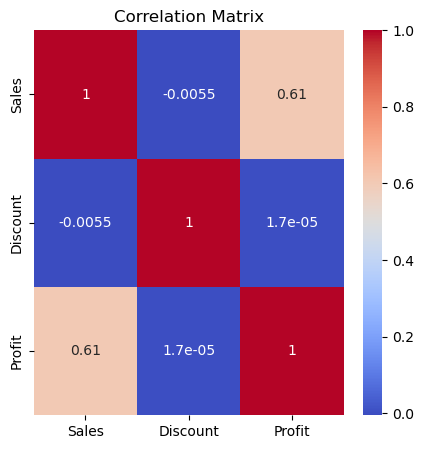

In [24]:
# Correlation matrix for sales, discount and profit columns using 
corr = df[['Sales', 'Discount', 'Profit']].corr()
# chart a correlation matrix for the numerical columns
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

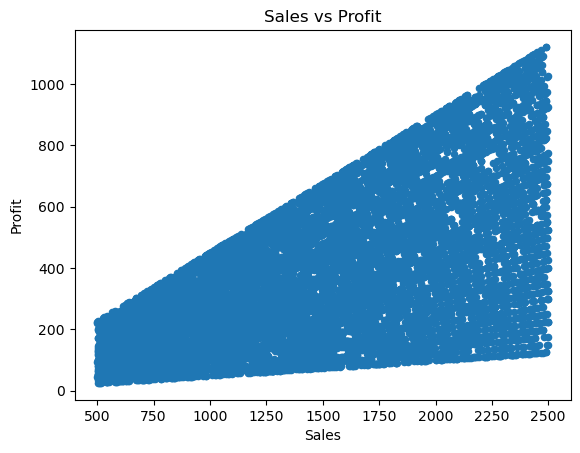

In [25]:
# Scatter plot for numerical columns
df.plot.scatter(x="Sales", y="Profit")
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

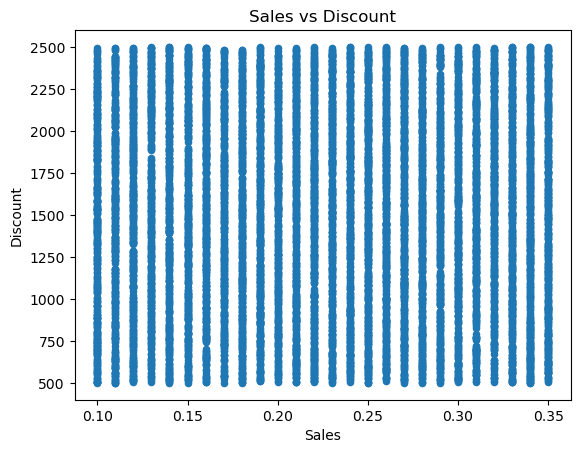

In [32]:
# Scatter plot for numerical columns
df.plot.scatter(x="Discount", y="Sales")
plt.title('Sales vs Discount')
plt.xlabel('Sales')
plt.ylabel('Discount')
plt.show()

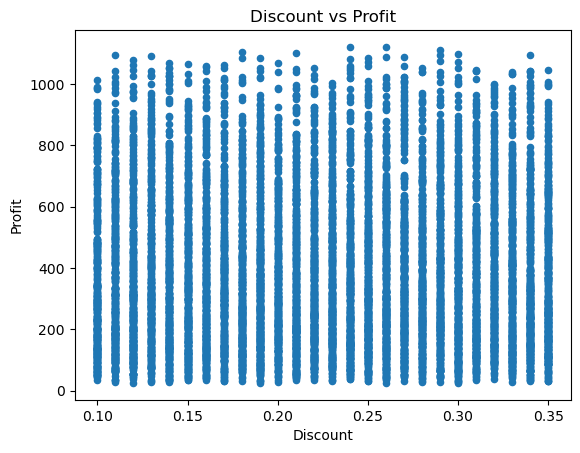

In [27]:
# Scatter plot for numerical columns
df.plot.scatter(x="Discount", y="Profit")
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

In [28]:
# Rename columns
df = df.rename(columns={
    "Order ID": "order_id",
    "Customer Name": "customer_name",
    "Category": "category",
    "Sub Category": "sub_category",
    "City": "city",
    "Order Date": "order_date",
    "Region": "region",
    "Sales": "sales",
    "Discount": "discount",
    "Profit": "profit",
    "State": "state"
 
})
df.head(10)

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state
0,OD1,Harish,seasoning,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,harvest,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,harvest,Fresh Vegetables,Trichy,2015-06-09,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,harvest,Fresh Fruits,Ramanadhapuram,2015-06-09,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,2015-06-09,West,1795,0.27,484.65,Tamil Nadu


In [29]:
# Save the dataframe to a new csv file
df.to_csv("output/cleaned_data.csv", index=False)